# Import Lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset

In [3]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Split the data into training and test sets

In [4]:
# x,y ---> x_train, x_test, y_train, y_test

x = df.drop('target', axis = 1)

y = df['target']

In [5]:
x.shape

(20640, 8)

In [6]:
y.shape

(20640,)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [8]:
x_train.shape

(16512, 8)

In [9]:
x_test.shape

(4128, 8)

# Scale the features

In [10]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [12]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

# 

# Build the neural network model

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

C:\Users\MA_Malekzadeh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [18]:
model.compile(optimizer = SGD(learning_rate= 0.01), loss= 'mse', metrics=['mae'])

# Train the model

In [26]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2941 - mae: 0.3770 - val_loss: 0.3192 - val_mae: 0.3927
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2993 - mae: 0.3760 - val_loss: 0.3151 - val_mae: 0.3765
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2888 - mae: 0.3705 - val_loss: 0.3164 - val_mae: 0.3885
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2714 - mae: 0.3608 - val_loss: 0.3107 - val_mae: 0.3786
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2856 - mae: 0.3671 - val_loss: 0.3173 - val_mae: 0.3904
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2877 - mae: 0.3681 - val_loss: 0.3138 - val_mae: 0.3952
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2736 - mae: 0.3623 - val_loss: 0.3066 - val_mae: 0.3748
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2813 - mae: 0.3614 - val_loss: 0.3218 - val_mae: 0.3930
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

# Evaluate the model on the test set

In [27]:
y_pred = model.predict(x_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
r2 = r2_score(y_test, y_pred)
r2

0.7745868507525195

In [38]:
test_loss, test_mae = model.evaluate(x_test,y_test)

test_mae

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2889 - mae: 0.3663


0.36822742223739624

In [39]:
test_loss

0.29538339376449585

# Plot

In [40]:
# Function to plot the training, validation, and test metrics
def plot_metrics(history, y_test, y_pred, test_loss, test_mae, metric_name):
    plt.plot(history.history[metric_name], label=f'Training {metric_name}')
    plt.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name}')
    if metric_name == 'loss':
        plt.scatter(len(history.history[metric_name]) - 1, test_loss, color='red', label='Test Loss')
    else:
        plt.scatter(len(history.history[metric_name]) - 1, test_mae, color='red', label='Test MAE')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.legend()
    plt.show()

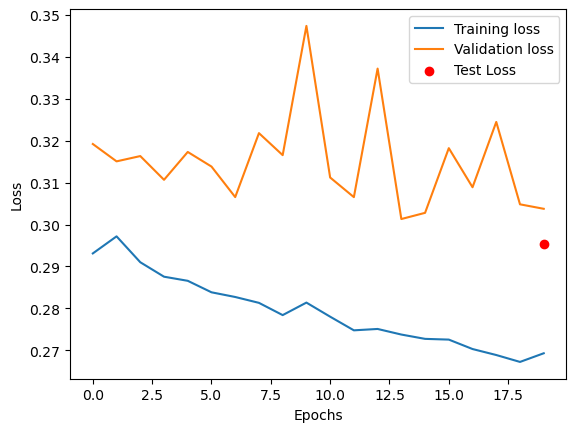

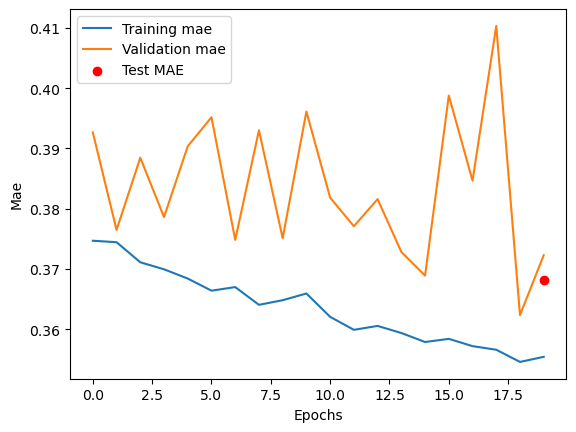

In [41]:
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'loss')
plot_metrics(history, y_test, y_pred, test_loss, test_mae, 'mae')